In [16]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import textwrap
import warnings

In [17]:
# prepare the data
f = r'input/PublishedARNs_structures.xlsx'
with warnings.catch_warnings(record=True):
    warnings.simplefilter("always")
    data = pd.read_excel(f, sheet_name='default')
cols = ['Group name', 'Substance name', 'EC / List no', 'CAS no', 'DSSTox_Compound_id', 'QC_Level']
data = data[cols].drop_duplicates()
data = data.rename({'EC / List no': 'EC number', 'CAS no': 'CAs number'}, axis='columns')
quality_scores = {'high': ['DSSTox_High', 'Public_High_CAS', 'Public_High'],
                  'medium/low': ['DSSTox_Low', 'Public_Low', 'Public_Medium']}
data['structural information'] = 'no structure'
for quality_score, vals in quality_scores.items():
    data['structural information'] = np.where(data['QC_Level'].isin(vals), quality_score, data['structural information'])
res = data.groupby('Group name')['structural information'].value_counts()
res = res.unstack(level=1).fillna(0.).astype(int)
res = res.reindex(['high', 'medium/low', 'no structure'], axis='columns')
# compute percentages
res_pct = res.div(res.sum(axis='columns'), axis='index')*100
idxs = res_pct.sort_values(by='high', ascending=False).index
res = res.loc[idxs]
res_pct = res_pct.loc[idxs]


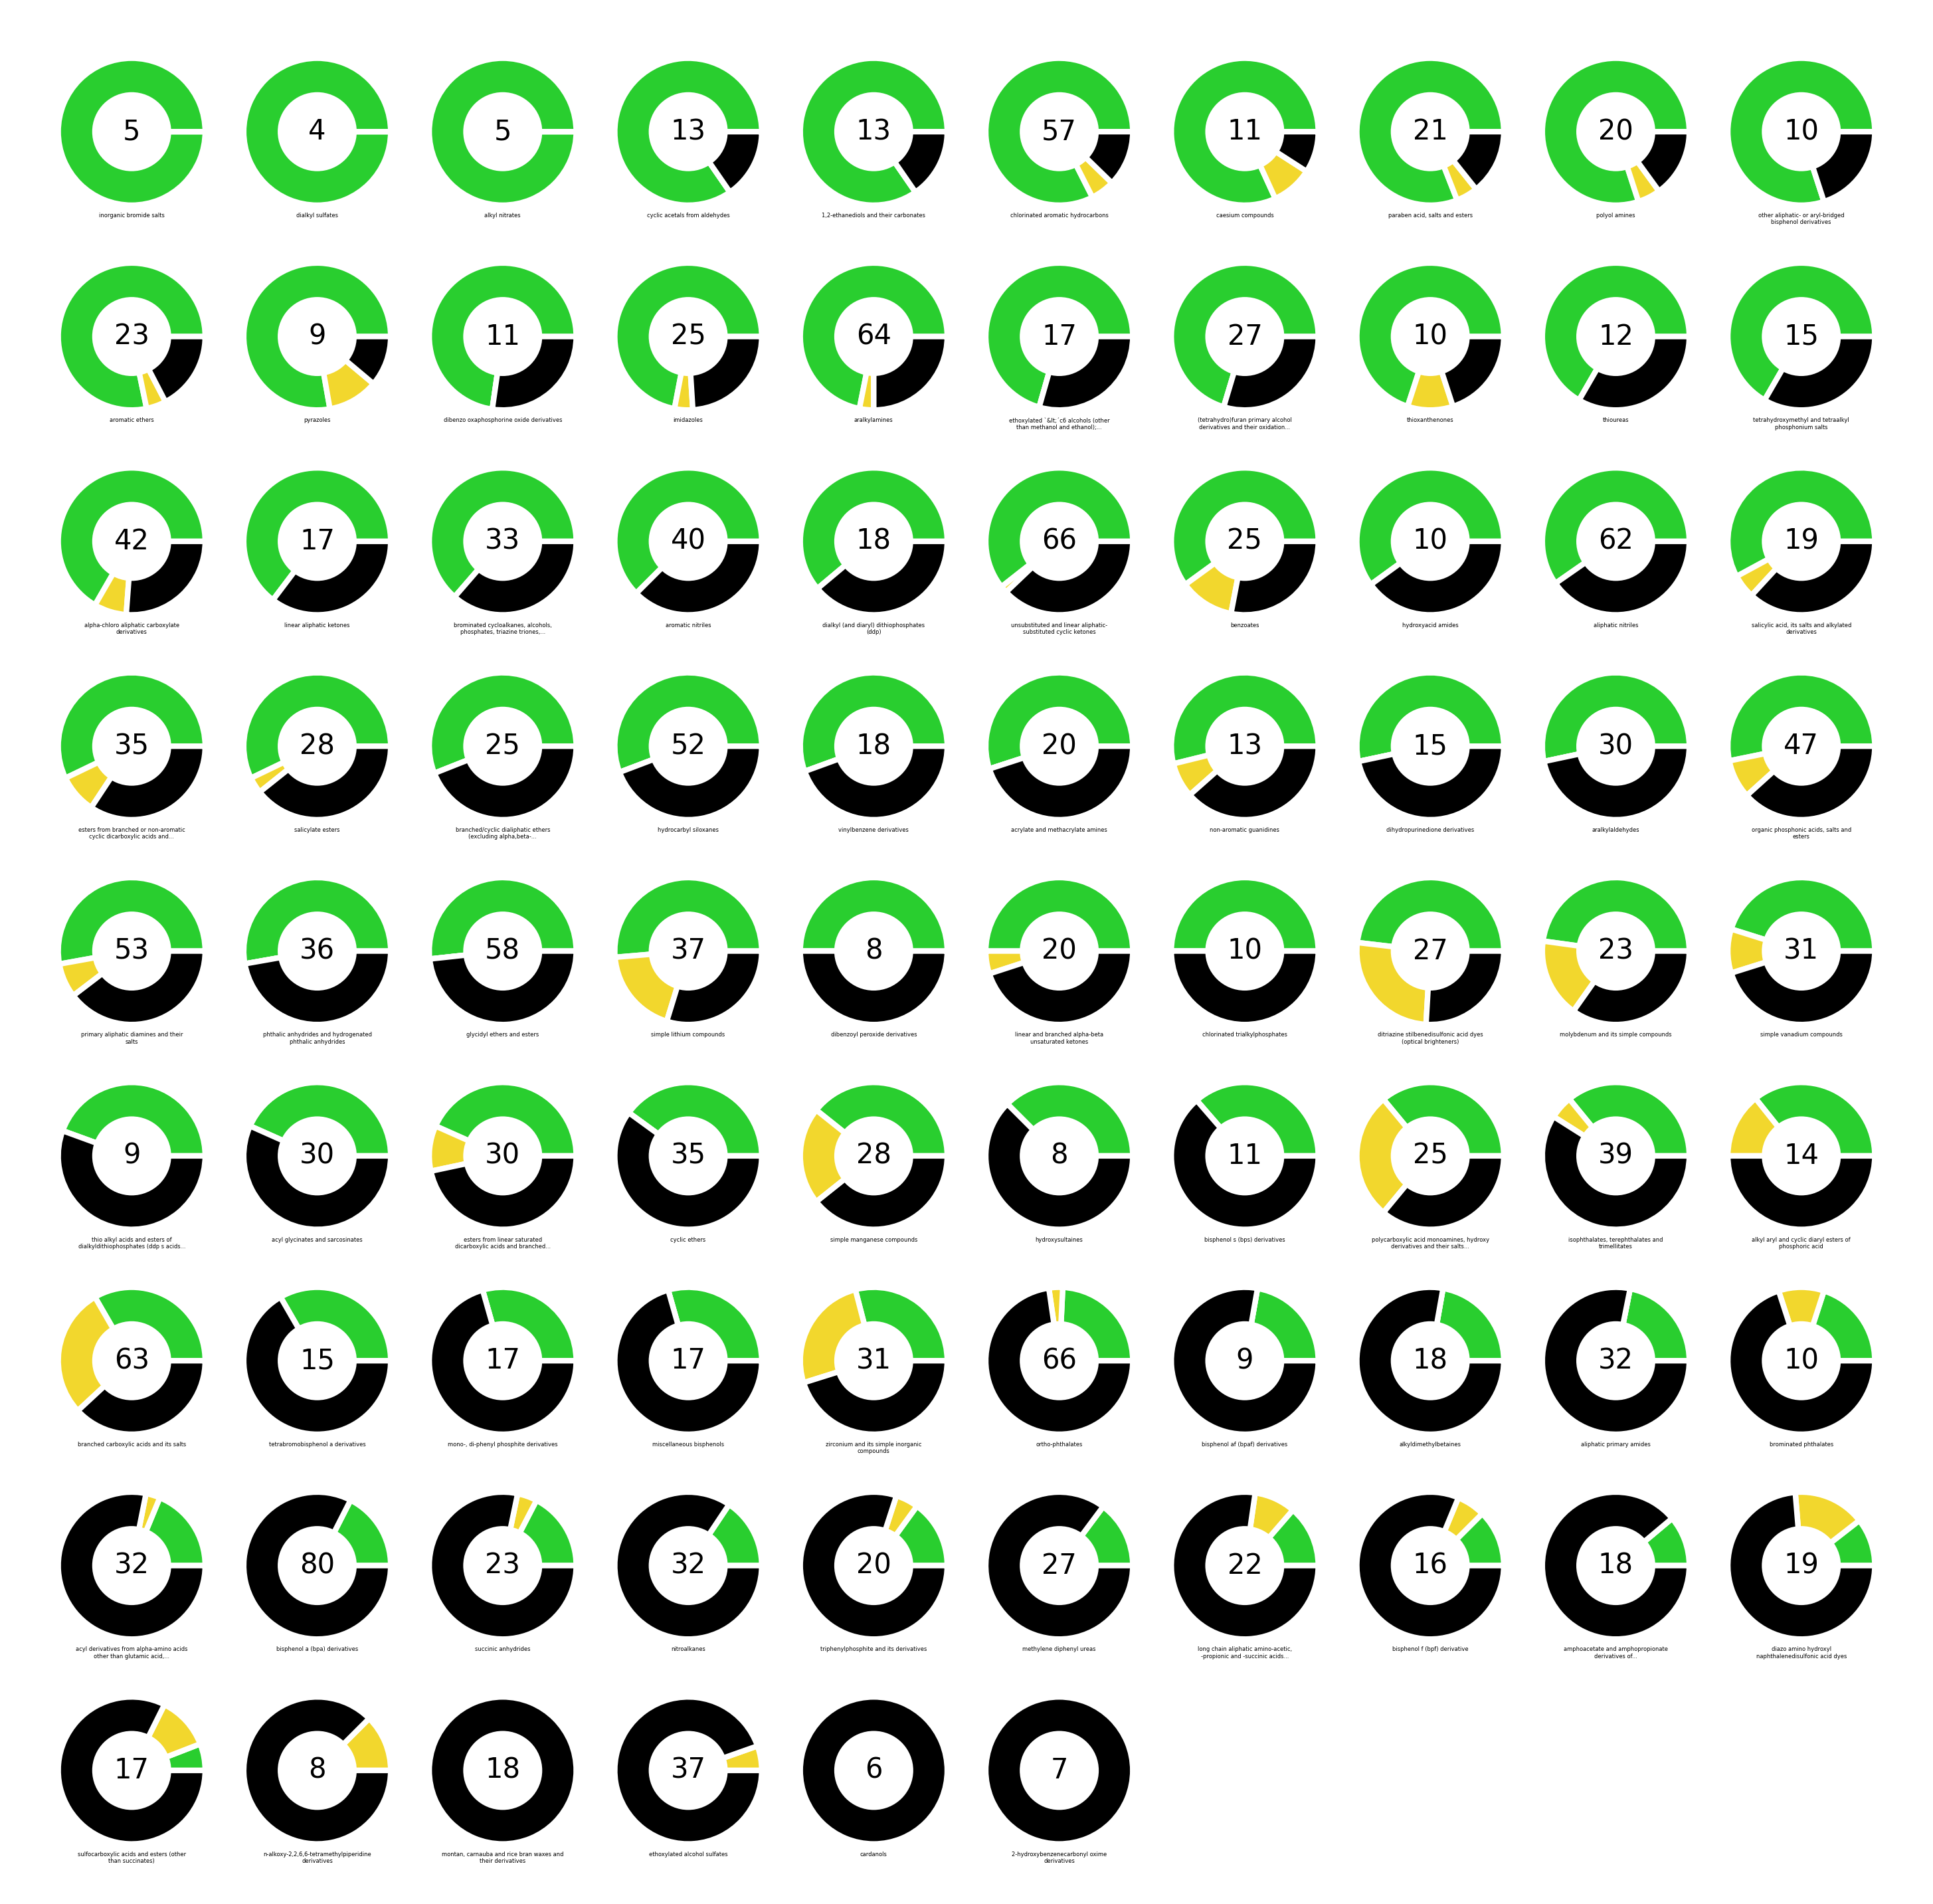

In [18]:

# crate the pie chart graph
n_cols = 10
n_rows = math.ceil(len(res)/n_cols)
fig = plt.figure(figsize=(6, 6), dpi=600)

fig.subplots_adjust()
axs = fig.subplots(nrows=n_rows, ncols=n_cols, gridspec_kw = {'wspace':0.01, 'hspace':0.01})
for i_group, ax in enumerate(axs.flatten()):

    if i_group < len(res):
        group_data = res.iloc[i_group]
        # group_data = group_data[group_data>0]
        names = group_data.index.to_list()
        size = group_data.to_numpy()
        # make the high quality structure count more pronounced
        explode = [0., 0., 0.]
        # set the colors
        colors = ['#29CE2F', '#F2D72D', '#000000']

        # Create a circle at the center of the plot
        my_circle = plt.Circle((0, 0), 0.5, color='white')

        # add the size of the group
        ax.text(0, 0, group_data.sum(), ha="center", va="center", rotation=0, size=5, bbox=None)
        # add the name of the group
        group_name = group_data.name.lower()
        group_name = textwrap.shorten(group_name, width=70, placeholder="...")
        group_name = '\n'.join(textwrap.wrap(group_name, width=40, break_long_words=False))
        ax.text(0, -1.1, group_name, ha="center", va="top", rotation=0, size=1.0, bbox=None)


        # Custom wedges
        ax.pie(size, labels=None, explode=explode, colors=colors, wedgeprops={'linewidth': 1, 'edgecolor': 'white'})
        ax.add_artist(my_circle)

    else:
        plt.setp(ax, visible=False)



In [19]:
f = r'groups_structural_information.png'
fig.savefig(f)